# Uvod

**Ime i prezime :** Filip Piptorošević IT11/2019

**Tema :** Detekcija godina, pola i emocija



Duboko učenje je vrsta mašinskog učenja koja oponaša neuronske mreže ljudskog mozga. To uključuje obuku računara da uči obrasce iz ogromne količine podataka. Koristeći više slojeva međusobno povezanih jedinica, zvanih neuroni, modeli dubokog učenja mogu automatski da izdvajaju karakteristike i donose predviđanja ili odluke bez eksplicitnog programiranja. Obično se koristi za zadatke kao što su prepoznavanje slike i govora, obrada prirodnog jezika, pa čak i igranje strateških igara.

# Pripremanje podataka

Instalacija gdown biblioteke pomoću koje će se preuzima dataset koji će se obrađivati.

In [2]:
!pip install gdown

Preuzimanje dataseta

In [3]:
import gdown

url = 'https://drive.google.com/u/0/uc?id=1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH'
output = '/content/imdb.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH
To: /content/imdb.zip
100%|██████████| 716M/716M [00:14<00:00, 50.8MB/s]


'/content/imdb.zip'

Pošto je dataset zipovan, neophodno je otpakovati ga.

In [4]:
!unzip imdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_crop/91/7259691_1983-04-27_2012.jpg  
  inflating: wiki_crop/91/7287691_1979-08-29_2012.jpg  
  inflating: wiki_crop/91/7294591_1987-12-25_2011.jpg  
  inflating: wiki_crop/91/731591_1964-07-17_2008.jpg  
  inflating: wiki_crop/91/739691_1956-09-20_2011.jpg  
  inflating: wiki_crop/91/741791_1917-12-18_2004.jpg  
  inflating: wiki_crop/91/743391_1954-03-15_2015.jpg  
  inflating: wiki_crop/91/7464891_1984-09-30_2013.jpg  
  inflating: wiki_crop/91/7534191_1983-04-17_2010.jpg  
  inflating: wiki_crop/91/763791_1934-12-30_1990.jpg  
  inflating: wiki_crop/91/7671891_1987-03-02_2006.jpg  
  inflating: wiki_crop/91/7711491_1982-12-06_2014.jpg  
  inflating: wiki_crop/91/77491_1916-04-05_1948.jpg  
  inflating: wiki_crop/91/779591_1953-03-01_2014.jpg  
  inflating: wiki_crop/91/7798491_1947-01-25_2013.jpg  
 extracting: wiki_crop/91/783791_1917-06-18_1967.jpg  
  inflating: wiki_crop/91/794891_1970-02-12_2011.jpg  
  infla

Učitavanje .mat fajla sa meta podacima dataseta.

In [5]:
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

Nakon učitavanja fajla, konvertujemo ga u .csv format.

In [6]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

#dat je prikaz kolona u .csv fajlu
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

#putanja do wiki.mat fajla
wiki_mat = '/content/wiki_crop/wiki.mat'

#učitavanje .mat fajla
wiki_data = loadmat(wiki_mat)

#brisanje wiki.mat fajla
del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

#računa razliku od datuma rođenja osobe i kada je slika kreirana
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

#čuva podatke u formi DataFrame-a, odnosno dvodimenzionalne tabele
final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

#genrisanje 100% uzorka
meta = meta.sample(frac=1)

#vrši se konverzija u .csv format
meta.to_csv('meta.csv', index=False)

In [7]:
data = pd.read_csv('meta.csv')
data.head()

,age,gender,path
0,23,male,wiki_crop/09/18978209_1990-07-29_2014.jpg
1,37,male,wiki_crop/02/41836802_1973-07-30_2011.jpg
2,26,male,wiki_crop/79/14915779_1915-12-17_1942.jpg
3,52,male,wiki_crop/47/6632347_1957-01-15_2010.jpg
4,28,male,wiki_crop/99/8440399_1983-03-15_2012.jpg


U narednoj ćeliji počinjemo sa obradom podataka, odnosno počinjemo sa filtriranjem i procesiranjem slika. Konkretno, radi se na detekciji godina.

In [8]:
# ovde se nalaze moduli koji su neophodni
import pandas as pd #služi za reprezentaciju podataka i manipulaciju sa istima
import numpy as np #višedimenzionalni nizovi i matrice
import cv2 #read i write image-a
import os  #sadrži funkcije za interakciju sa operativnim sistemom
from sklearn.model_selection import train_test_split

#dataset se učitava
meta = pd.read_csv('meta.csv')

#neophodne samo godine
meta = meta.drop(['gender'], axis=1)

#dataset se filtrira (godine u rasponu od 0 do 101)
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

#podaci se transformišu u numpy array
meta = meta.values

#dataset se deli na trening i testni skup u odnosu 80% - 20%
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

#u ovom code block-u se kreiraju neophodni direktorijumi
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

#trening i testni dataset-ovi se kreiraju
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128)) #vrši se resize-ovanje slike na 128 piksela
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('Processing : '+str(counter) +' Image : ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Processing: 3033 Image: 61
Processing: 3034 Image: 50
Processing: 3035 Image: 74
Processing: 3036 Image: 26
Processing: 3037 Image: 49
Processing: 3038 Image: 19
Processing: 3039 Image: 54
Processing: 3040 Image: 27
Processing: 3041 Image: 42
Processing: 3042 Image: 60
Processing: 3043 Image: 36
Processing: 3044 Image: 24
Processing: 3045 Image: 20
Processing: 3046 Image: 27
Processing: 3047 Image: 25
Processing: 3048 Image: 20
Processing: 3049 Image: 35
Processing: 3050 Image: 30
Processing: 3051 Image: 28
Processing: 3052 Image: 32
Processing: 3053 Image: 23
Processing: 3054 Image: 24
Processing: 3055 Image: 29
Processing: 3056 Image: 46
Processing: 3057 Image: 46
Processing: 3058 Image: 41
Processing: 3059 Image: 22
Processing: 3060 Image: 24
Processing: 3061 Image: 32
Processing: 3062 Image: 31
Processing: 3063 Image: 28
Processing: 3064 Image: 20
Processing: 3065 Image: 26
Processing: 3066 Image: 24
Processing: 3067 Image: 24
Proc

Na sličan način, u sledećoj ćeliji radi se procesiranje slika za prepoznavanje godina.

In [9]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

meta = pd.read_csv('meta.csv')

#ovde se briše kolona age, u prethodnoj ćeliji smo brisali kolonu gender
meta = meta.drop(['age'], axis=1)

#deli se dataset u odnosu 90% - 10%
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

#kako ne bi dolazilo do problema, usled nejednakosti u broju slika muškog i ženskog pola
#selektuje se isti broj slika u trening skupu
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

#shuffling dataseta - dakle uzeće i izmešati ceo dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

#kreiraju se neophodni direktorijumi
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

#loading slika u testni i trening skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Processing: 16298 Image: male
Processing: 16299 Image: male
Processing: 16300 Image: male
Processing: 16301 Image: male
Processing: 16302 Image: male
Processing: 16303 Image: male
Processing: 16304 Image: male
Processing: 16305 Image: male
Processing: 16306 Image: male
Processing: 16307 Image: male
Processing: 16308 Image: male
Processing: 16309 Image: male
Processing: 16310 Image: male
Processing: 16311 Image: male
Processing: 16312 Image: male
Processing: 16313 Image: male
Processing: 16314 Image: male
Processing: 16315 Image: male
Processing: 16316 Image: male
Processing: 16317 Image: male
Processing: 16318 Image: male
Processing: 16319 Image: male
Processing: 16320 Image: male
Processing: 16321 Image: male
Processing: 16322 Image: male
Processing: 16323 Image: male
Processing: 16324 Image: male
Processing: 16325 Image: male
Processing: 16326 Image: male
Processing: 16327 Image: male
Processing: 16328 Image: male
Processing: 16329 I

# Kreiranje modela

U narednim ćelijama se izvršavaju treninzi, odnosno kreiraju se modeli za prepoznavanje pola i godina. Prvo se kreira model za prepoznavanje pola.

In [10]:
!pip install tensorflow
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 738.8 kB/s eta 0:00:00


In [109]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator

#arhitektura se zasniva na sekvenci slojeva modela
#sekvencijalni model, koji podrazumeva niz slojeva modela
model = Sequential()

#MobileNetV2 jeste sledeći model koji se koristi
#model koji je učitan sa težinama koje su unapred učitane u ImageNet-u
mobile = MobileNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

#mobile model se dodaje i konfiguriše se output sloj
#Dense je sloj neuronske mreže koji ima dva neurona, a tip funkcije koja ga aktivira je softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

#model se kompajlira i navode se optimizatori
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

#podaci o modelu se print-uju
print(model.summary())


#koristi se ImageDataGenerator klasa za data augmentaciju
#omogućenje augmentacije dok se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#čita se trening skup
#navodi se dimenzija treniranja
#categorical - je zapravo 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#čita se testni skup
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#za bolje rezultate vrši se prilagođavanje epohe
history1 = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)

#poslednji korak podrazumeva čuvanje modela
model.save('weights/gender_mobile.h5')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense_6 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,226,434
Non-trainable params: 34,112
_________________________________________________________________
None
Found 18808 images belonging to 2 classes.
Found 21408 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 560s 5s/step - loss: 0.9532 - accuracy: 0.6795 - val_loss: 1.2939 - val_accuracy: 0.5384
Epoch 2/10
100/100 [==============================] - 540s 5s/step - loss: 0.6369 - accuracy: 0.7764 - val_loss: 1.0427 - val_accuracy

In [ ]:
#nakon što izvršavanje završeno radi se analiza performansi modela
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 125ms/step


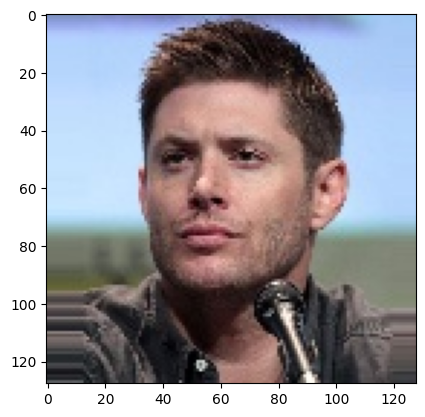

Muško


In [65]:
#vrši se provera modela
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/36/1113.jpg'
gender_pred = model.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

if gender_pred[0][0]<gender_pred[0][1]:
    print('Žensko')
else:
    print('Muško')

U narednoj ćeliji se kreira model za detekciju godina.

In [67]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator

#kreiranje sekvencijalnog modela
model2 = Sequential()

#drugi tip modela koji se koristi InceptionResNetV2
mobile = InceptionResNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

#dodaje se mobile model
#sloj neuronske mreže sa 102 neurona i tip funkcije aktivacije je softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

#model se kompajlira i navode se optimizatori
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

#prikaz podataka
print(model2.summary())

#ImageDataGenerator se koristi za augmentaciju, koja se primenjuje dok se model trenira
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

#trening skup se čita
train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#testni skup se iščitava
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

#zbog performantnosti se prilagođavaju epohe
history2 = model2.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)

#model se čuva
model2.save('weights/age_inception.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 102)               156774    
                                                                 
Total params: 54,493,510
Trainable params: 54,432,966
Non-trainable params: 60,544
_________________________________________________________________
None
Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.
Epoch 1/10
100/100 [==============================] - 2540s 25s/step - loss: 4.7100 - accuracy: 0.0227 - val_loss: 4.7411 - val_accuracy: 0.0269
Epoch 2/10
100/100 [==============================] - 2573s 26s/step - loss: 4.2846 - accuracy: 0.0377 - val_loss: 4.3543 - val_

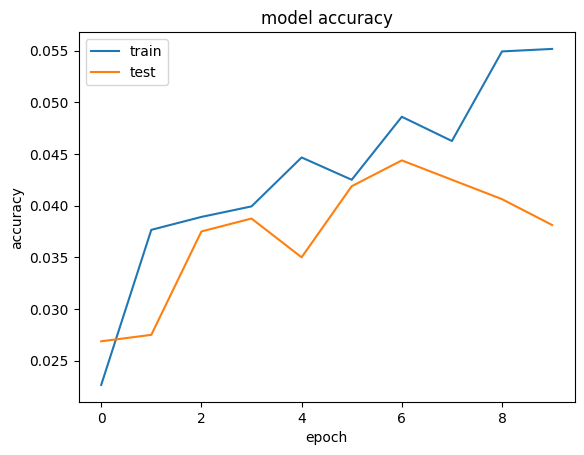

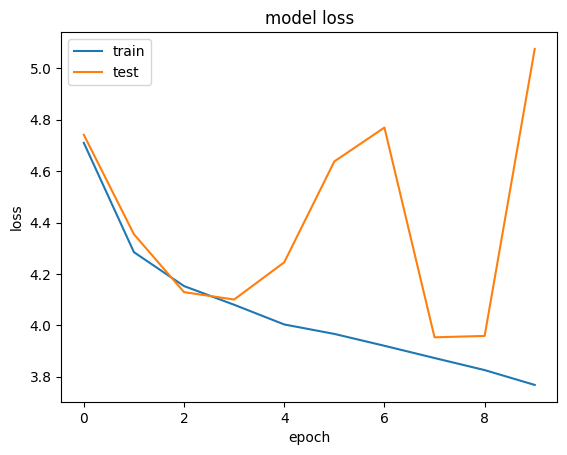

In [68]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 312ms/step


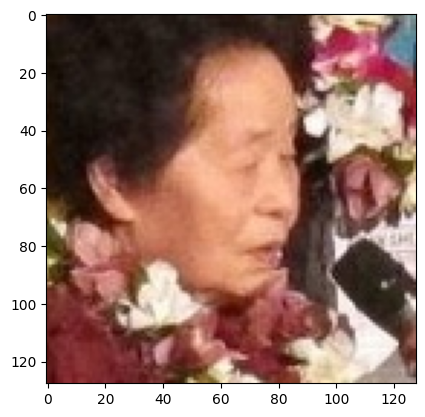

50
50-74 godina


In [90]:
#rezultati se proveravaju
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/98/7253.jpg'
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

print(temp)
if temp in range(0, 24):
  print('0-24 godina')
if temp in range(25, 49):
  print('25-49 godina')
if temp in range(50, 74):
  print('50-74 godina')
if temp in range(75, 99):
  print('75-99 godina')
if temp in range(91, 101):
  print('91-101 godina')

In [91]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=757bd88f3e5fbb74d1798eabf2451af9c53585868b13b62df6e3ca281f0a01e3
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


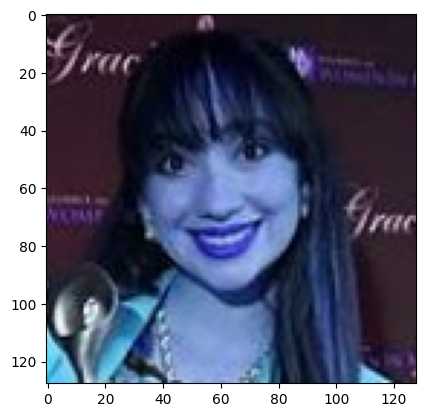

In [95]:
import cv2
from deepface import DeepFace
img = cv2.imread('/content/dataset/age/test/17/1139.jpg')
import matplotlib.pyplot as plt
plt.imshow(img)

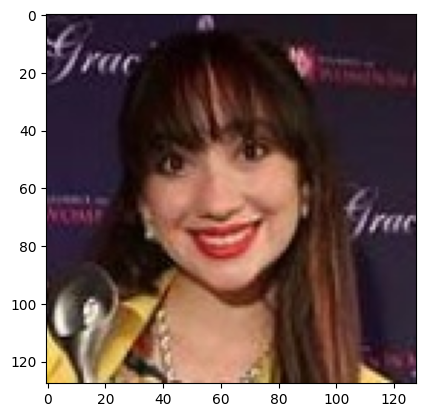

In [96]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #vraćanje slike na prirodan ten

In [99]:
predictions = DeepFace.analyze(img) #analiza slike

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


In [100]:
predictions

[{'emotion': {'angry': 4.355709543046871e-09,
   'disgust': 5.1270226670944996e-14,
   'fear': 5.892816790087352e-08,
   'happy': 99.99583959579468,
   'sad': 9.812696211142224e-08,
   'surprise': 2.8798696760645726e-06,
   'neutral': 0.004158341107540764},
  'dominant_emotion': 'happy',
  'region': {'x': 26, 'y': 24, 'w': 70, 'h': 70},
  'age': 32,
  'gender': {'Woman': 99.99618530273438, 'Man': 0.0038200905692065135},
  'dominant_gender': 'Woman',
  'race': {'asian': 99.17871947161672,
   'indian': 0.0030345368930933636,
   'black': 0.0008696133199837081,
   'white': 0.47177838179638276,
   'middle eastern': 0.018014658035652817,
   'latino hispanic': 0.32758579679344874},
  'dominant_race': 'asian'}]

In [103]:
predictions[0]['dominant_emotion']

'happy'

In [104]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [105]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x, y, w, h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

In [107]:
#dodavanje neophodnog teksta raspoloženja na slici
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0,120),
            font,
            1,
            (0, 0, 255),
            2,
            cv2.LINE_4)

array([[[ 29,  11,  24],
        [ 41,  23,  36],
        [ 52,  34,  47],
        ...,
        [ 32,  22,  34],
        [ 32,  22,  34],
        [ 32,  22,  34]],

       [[ 65,  47,  60],
        [ 40,  22,  35],
        [ 43,  25,  38],
        ...,
        [ 33,  23,  35],
        [ 33,  23,  35],
        [ 33,  23,  35]],

       [[ 59,  39,  52],
        [ 59,  39,  52],
        [ 56,  36,  49],
        ...,
        [ 34,  24,  36],
        [ 34,  24,  36],
        [ 34,  24,  36]],

       ...,

       [[ 50, 183, 221],
        [ 47, 173, 214],
        [ 69, 181, 227],
        ...,
        [ 51,  30,  52],
        [ 78,  56,  75],
        [114,  90, 108]],

       [[ 41, 174, 212],
        [ 64, 190, 231],
        [ 88, 203, 248],
        ...,
        [ 56,  37,  52],
        [ 51,  31,  43],
        [ 67,  47,  59]],

       [[ 47, 180, 218],
        [ 76, 202, 243],
        [ 90, 205, 250],
        ...,
        [ 62,  45,  56],
        [ 51,  32,  41],
        [ 63,  45,  52]]

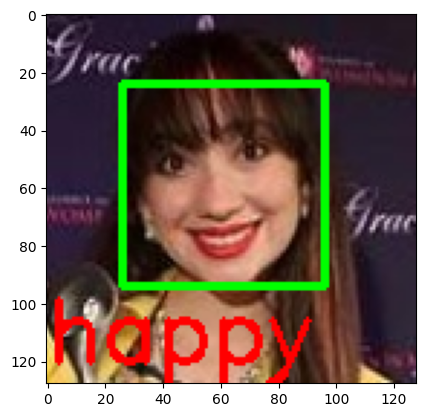

In [108]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Zaključak

Na samom početku izrade ovog projekta bilo je neophodno konvertovati .mat fajl u .csv kako bi dalja obrada bila moguća. Na modelu za obradu pola je bilo neophodno odraditi višestruki fine-tuning kako bi davao zadovoljavajuće rezultate. Uzrok je najverovatnije neravnomerna raspodela polova u ovom datasetu (muških slika ima više nego ženskih). Osim toga, dataset koji je obrađivan nije bio najidealniji, zbog prisustva velikog broja fotografija koje nisu zadovoljavale potrebne uslove tako da je prvo bilo potrebno temeljno isfiltrirati fotografije, kako bi kasnije mogle da se koriste u treniranju modela. Na samom kraju projekta, za detekciju emocija je iskorišćena DeepFace biblioteka.

Zbog same prirode podataka, projekat je na početku bilo teže odraditi, ali kako se sve bližilo kraju bilo je sve lakše.

# Reference

[1] Korišćeni dataset - https://drive.google.com/file/d/1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH/view

[2] https://keras.io/api/optimizers/

[3] https://viso.ai/computer-vision/deepface/


